In [22]:
import lightning as pl
import torch.nn.functional as F
from torch import nn, optim
import torch
from torchvision import datasets, transforms

In [122]:
# create a lightning class
class NN(pl.LightningModule):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=50),
            nn.ReLU(),
            nn.Linear(in_features=50, out_features=10)
        )
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        y_hat = self.model(x)
        return y_hat

    def _step(self, batch, batch_idx):
        x, y = batch
        x = x.reshape(x.size(0), -1)
        y_hat = self.forward(x)
        loss = self.loss_fn(y_hat, y)
        return loss
        
    def training_step(self, batch, batch_idx):
        loss = self._step(batch, batch_idx)
        self.log("train_loss", loss)

        return loss

    def validation_step(self, batch, batch_idx):
        loss = self._step(batch, batch_idx)
        self.log("val_loss", loss)

        return loss

    def test_step(self, batch, batch_idx):
        loss = _step(batch, batch_idx)
        self.log("test_loss", loss)

        return loss

    def predict_step(self, batch, batch_idx):
        x, y = batch
        x = x.reshape(x.size(0), -1)
        y_hat = self.forward(x)
        preds = torch.argmax(y_hat, dim=1)

        return preds

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=0.001)

In [123]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [124]:
# load train data
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())

In [125]:
# load test data
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())

In [126]:
# train data loader
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=64
)

In [127]:
# test data loader
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=64
)

In [128]:
for item in train_loader:
    print(f"x shape = {item[0].shape}")
    print(f"y shape = {item[1].shape}")
    print(f"x type = {type(item[0])}")
    print(f"y type = {type(item[1])}")
    break

x shape = torch.Size([64, 1, 28, 28])
y shape = torch.Size([64])
x type = <class 'torch.Tensor'>
y type = <class 'torch.Tensor'>


In [129]:
# create lightning model
model = NN(input_size=28*28, num_classes=10).to(device)

In [130]:
# create a trainer and fit
trainer = pl.Trainer(accelerator="gpu", devices=[0], max_epochs=10)
trainer.fit(model, train_loader, test_loader)

Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params | Mode 
-----------------------------------------------------
0 | model   | Sequential       | 39.8 K | train
1 | loss_fn | CrossEntropyLoss | 0      | train
-----------------------------------------------------
39.8 K    Trainable params
0         Non-trainable params
39.8 K    Total params
0.159     Total estimated model params size (MB)
5         Modules in train mode
0         Modules in eval mode


Sanity Checking: |                                                                                            …

Training: |                                                                                                   …

Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



Validation: |                                                                                                 …

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [137]:
# infer number from a test image
input_image = test_data[1][0]
preds = model(input_image.reshape(28*28))

In [141]:
print(preds)
torch.argmax(preds)

tensor([ -3.9316,   3.7321,   9.6028,   1.4504, -18.6409,  -4.8391,  -2.9120,
        -21.1585,  -2.7298, -16.5233], grad_fn=<ViewBackward0>)


tensor(2)

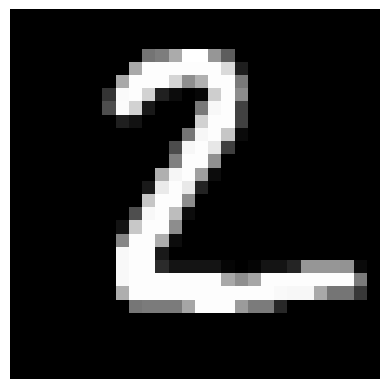

In [139]:
# display input image
import matplotlib.pyplot as plt

image = input_image.reshape(28, 28).to("cpu").detach().numpy()
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()